## Description of Dataset

### Basically this dataset is urdu sign language dataset in which we have to classify Alphabets of Urdu using Convolutional Neural Network. This Dataset have urdu alphabet's sign images.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform

## Preprocessing Images

In [ ]:
def Preprocess_image(path):
  img_size=200
  j=0
  X=[]
  Y=[]
  for i in os.listdir(path):
    print(f'{i}')
    if not i.startswith('.'):
      if i in ['Aliph ا']:
        label = 1
      elif i in ['Bay ب']:
        label = 2
      elif i in ['Pay پ']:
        label = 3    
      elif i in ['Tay ت']:
        label = 4   
      elif i in ['Tey ٹ']:
        label = 5
      elif i in ['Thay ث']:
        label = 6
      elif i in ['Jeem ج']:
        label = 7
      elif i in ['Chay چ']:
        label = 8
      elif i in ['hey ح']:
        label = 9       
      elif i in ['Khay خ']:
        label = 10
      elif i in ['Daal  د']:
        label = 11              
      elif i in ['Daal ڈ']:
        label = 12
      elif i in ['Dhaal ذ']:
        label = 13         
      elif i in ['Ray ر']:
        label = 14    
      elif i in ['aRay ڑ']:
        label = 15
      elif i in ['Zay ز']:
        label = 16
      elif i in ['Djay ژ']:
        label = 17
      elif i in ['Seen س']:
        label = 18
      elif i in ['Sheen \u200e\u200eش']:
        label = 19
      elif i in ['Suaad ص']:
        label = 20
      elif i in ['Dhuaad ض']:
        label = 21
      elif i in ["Toay'n ط"]:
        label = 22
      elif i in ["Zoay'n ظ"]:
        label = 23
      elif i in ['Ain ع']:
        label = 24
      elif i in ['Ghain غ']:
        label = 25
      elif i in ['Fay ف']:
        label = 26     
      elif i in ['Quaaf ق']:
        label = 27      
      elif i in ['Kaaf ک']:
        label = 28  
      elif i in ['Gaaf گ']:
        label = 29
      elif i in ['Laam ل']:
        label = 30     
      elif i in ['Meem م']:
        label = 31      
      elif i in ['Noon ن']:
        label = 32
      elif i in ['Vao و']:
        label = 33
      elif i in ['Hay ہ']:
        label = 34   
      elif i in ['Hamza \u200d\u200cء']:
        label = 35
      elif i in ['Chhoti yeh ی']:
        label = 36
      elif i in ['Bari yeh ے']:
        label = 37
      
      for img_name in tqdm(os.listdir(path+i)):
        img_file=imread(path+i+'/'+img_name)
        if img_file is not None:
          img_file=transform.resize(img_file,(img_size,img_size,3))
          X.append(img_file)
          Y.append(label)
  X=np.asarray(X)
  Y=np.asarray(Y)
  return X,Y

## Import Dataset from the drive

In [ ]:
path='/content/drive/MyDrive/Deep Learning Project/Dataset/PSL/'
X,Y=Preprocess_image(path)  #Preprocess Image Assigning Label to each image and resize it 200x200x3
np.savez('/content/drive/MyDrive/Deep Learning Project/Dataset/Preprocess_Images.npz',X,Y)  # Saving Data into the Numpy files format

In [ ]:
# Loading Data from Numpy files X,Y

Data=np.load('/content/drive/MyDrive/Deep Learning Project/Dataset/Preprocess_Images.npz')
print(Data.files)
X=Data[Data.files[0]]
Y=Data[Data.files[1]]

['arr_0', 'arr_1']


## Split Dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(1056, 200, 200, 3),(1056,) Testing Data->((453, 200, 200, 3), (453,))


## Graphical Representation (Visualization) of Dataset.

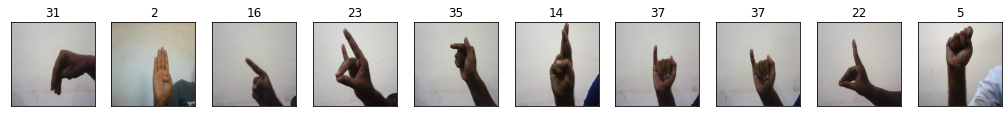

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
# OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=38)
Y_test=to_categorical(Y_test,num_classes=38)

In [ ]:
Y_train.shape,Y_test.shape

((1056, 38), (453, 38))

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

## Building CNN Model

In [ ]:
# Creating Model
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(38,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [ ]:
from time import time
tic=time()
epoch=50
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time: {toc-tic}')

Epoch 1/50
27/27 [==============================] - 14s 112ms/step - loss: 3.6431 - accuracy: 0.0213 - val_loss: 3.6297 - val_accuracy: 0.0330
Epoch 2/50
27/27 [==============================] - 2s 68ms/step - loss: 3.4083 - accuracy: 0.1007 - val_loss: 2.9934 - val_accuracy: 0.1981
Epoch 3/50
27/27 [==============================] - 2s 67ms/step - loss: 2.2082 - accuracy: 0.4384 - val_loss: 1.7096 - val_accuracy: 0.5425
Epoch 4/50
27/27 [==============================] - 2s 67ms/step - loss: 1.0111 - accuracy: 0.7299 - val_loss: 1.0942 - val_accuracy: 0.7123
Epoch 5/50
27/27 [==============================] - 2s 68ms/step - loss: 0.4088 - accuracy: 0.8791 - val_loss: 1.1097 - val_accuracy: 0.7500
Epoch 6/50
27/27 [==============================] - 2s 67ms/step - loss: 0.2464 - accuracy: 0.9206 - val_loss: 1.1336 - val_accuracy: 0.7972
Epoch 7/50
27/27 [==============================] - 2s 67ms/step - loss: 0.1270 - accuracy: 0.9573 - val_loss: 0.9833 - val_accuracy: 0.8019
Epoch 8/50


In [ ]:
model.save('/content/drive/MyDrive/Deep Learning Project/Simple_Conv_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Deep Learning Project/Simple_Conv_model.h5')

## Evaluate Model

Text(0.5, 1.0, 'Loss evolution')

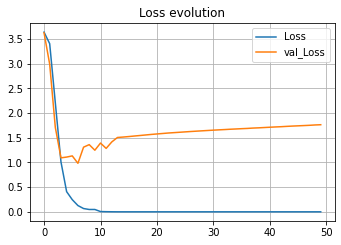

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

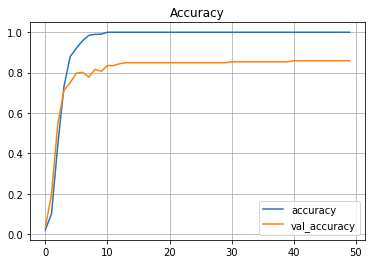

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=2)

15/15 - 0s - loss: 2.7101 - accuracy: 0.7748 - 481ms/epoch - 32ms/step


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
print(y_pred)

[16 35 34 17  6 10  5 26  3 23 20 33 13 29 23  4 26 28  7 11  6 15 11 33
  2 13 15 20 25 24 14 36  8  3 30  2 36 25 37 25 37 30 19 19  7 10 27 25
 10 27  5 19 30 28 14 16 37 34 36 36  1 17 34 23 36 23 28 32  8 11 12 29
 21 20 29 31  5 11 16 10  8 33 36 36  8 30 14 31 23 11 10 31 20 24 16 32
 15  9 12 13  3 36  5  9 18 22 13 22 31 36 16 36  7 19 36 22 28 14 31  2
 10 20  5 25 37  3 18 23 28 17  8 35 20 25 16  2 26 20 15 11 13 26  3 37
 14 23 34 13 13 23 37 26 13 23 26 26 21 19 21  3 31 23  7  6 36 17 14 31
 20 15 23 21  1 13 34 31 18 21 17 35 19  9 14 19 28 33 36 23  2 28  1 13
  3  2  1  3 35  5  2 26 22  4 35 19 26  6 20 10 16 16 13 31 31  2 31 12
 35 15 20 17 14 22 28 34 27  6 31 20  4 30 23 22 16 11 31  8  6 15  9  2
 14 24 24 28 33  9 26 10 33 15 25 32 34 27 11 15 17 27 36 32 19  4  6 21
 21 26 27 10  5 23  9  4 24 25 37 15 13  5 15 37 26  7 11 33  1  2 13 26
 19 34 34  6 31 11  7  8 30 14 20 20 11 28 15 17 16 34 30 34  3 27 25 30
  6 19 16 36 29 32  6  3 21 34 35  4 26 29  9  4 11

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_test=np.argmax(Y_test,axis=1)
print(f'Y_test Shape: {Y_test.shape}')
print(f'Y_pred Shape: {y_pred.shape}')

Y_test Shape: (453,)
Y_pred Shape: (453,)


In [ ]:
from sklearn import metrics
score=metrics.accuracy_score(Y_test,y_pred)
print(f"Accuracy test: {score}")
print(f'Classification Report:')
print(metrics.classification_report(Y_test,y_pred))
print(f'Confusion Matrix')
print(metrics.confusion_matrix(Y_test,y_pred))

Accuracy test: 0.7748344370860927
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13
           3       0.86      1.00      0.92        12
           4       0.89      0.73      0.80        11
           5       0.67      1.00      0.80         8
           6       0.73      0.57      0.64        14
           7       0.89      0.62      0.73        13
           8       0.90      0.69      0.78        13
           9       0.67      0.55      0.60        11
          10       0.93      1.00      0.97        14
          11       0.62      0.73      0.67        11
          12       1.00      0.75      0.86         8
          13       0.94      1.00      0.97        15
          14       0.80      0.92      0.86        13
          15       0.88      0.82      0.85        17
          16       0.86      0.80      0.83        15
          17       0.89 

<Figure size 1440x1440 with 0 Axes>

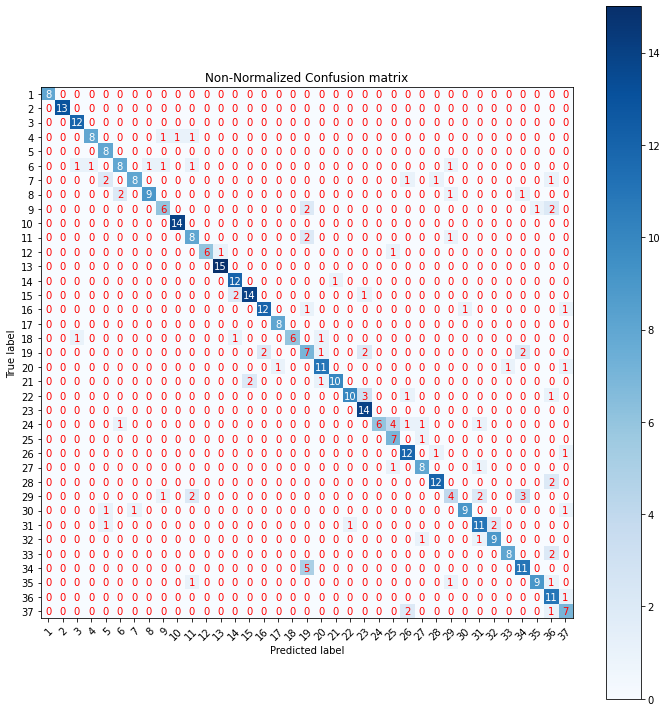

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,y_pred)
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        # Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
# Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
#Specifying class labels
class_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,31,32,33,34,35,36,37,38]
plt.figure(figsize=(20,20))
plot_confusion_matrix(Y_test,y_pred, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

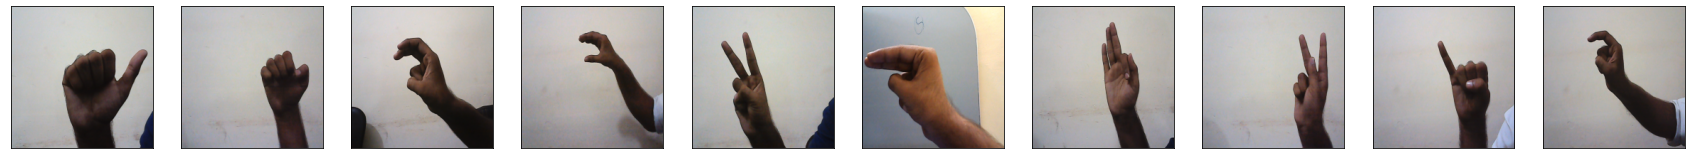

Actual Labels: [16, 35, 34, 17, 6, 10, 5, 26, 3, 19, 20, 33, 13, 6, 15, 4, 26, 28, 7, 11, 6, 15, 11, 33, 2, 12, 15, 20, 12, 24, 14, 36, 8, 3, 30, 2, 9, 24, 26, 25, 36, 30, 19, 34, 7, 10, 27, 25, 10, 27, 7, 19, 30, 28, 18, 16, 37, 29, 7, 36, 1, 17, 34, 23, 33, 19, 28, 32, 8, 11, 12, 8, 21, 20, 29, 31, 5, 29, 19, 10, 8, 33, 28, 36, 6, 30, 14, 31, 23, 11, 10, 31, 20, 24, 16, 32, 15, 9, 12, 13, 6, 36, 7, 4, 18, 22, 13, 31, 27, 36, 19, 35, 7, 34, 37, 22, 26, 15, 29, 2, 10, 20, 30, 25, 37, 3, 18, 23, 28, 17, 8, 35, 20, 24, 16, 2, 26, 20, 15, 11, 13, 26, 3, 37, 14, 23, 34, 13, 13, 22, 37, 26, 13, 23, 26, 26, 14, 34, 21, 3, 31, 23, 7, 6, 36, 17, 14, 31, 19, 15, 23, 21, 1, 13, 34, 31, 18, 21, 17, 35, 19, 9, 14, 19, 28, 20, 33, 22, 2, 28, 1, 13, 3, 2, 1, 3, 35, 5, 2, 26, 22, 6, 35, 19, 24, 6, 20, 4, 16, 16, 13, 31, 31, 2, 32, 12, 9, 15, 20, 17, 14, 22, 28, 34, 27, 24, 29, 20, 4, 30, 23, 22, 16, 11, 24, 8, 6, 15, 9, 2, 14, 24, 24, 28, 33, 9, 37, 10, 33, 15, 27, 32, 8, 27, 6, 21, 17, 32, 36, 32, 3

In [ ]:
# Regularization # Dropout regularization
# y_pred = model.predict(X_test[10:20])
# y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
#Supporting Code
#y_testint = np.argmax(y_test[10:20], axis=1)
# print ("Predicted scores for images: {}".format(y_pred))
y_pred_list = list()
y_test_list = list()
for num in y_pred:
    y_pred_list.append(num)
for num in Y_test:
    y_test_list.append(num)

n =10  # how many digits we will display
plt.figure(figsize=(30, 8))
for i in range(10,20):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
print ("Actual Labels: {}".format(y_test_list))
print ("Predicted Labels: {}".format(y_pred_list))

In [ ]:
print(y_test_list)
print(y_pred_list)

[16, 35, 34, 17, 6, 10, 5, 26, 3, 19, 20, 33, 13, 6, 15, 4, 26, 28, 7, 11, 6, 15, 11, 33, 2, 12, 15, 20, 12, 24, 14, 36, 8, 3, 30, 2, 9, 24, 26, 25, 36, 30, 19, 34, 7, 10, 27, 25, 10, 27, 7, 19, 30, 28, 18, 16, 37, 29, 7, 36, 1, 17, 34, 23, 33, 19, 28, 32, 8, 11, 12, 8, 21, 20, 29, 31, 5, 29, 19, 10, 8, 33, 28, 36, 6, 30, 14, 31, 23, 11, 10, 31, 20, 24, 16, 32, 15, 9, 12, 13, 6, 36, 7, 4, 18, 22, 13, 31, 27, 36, 19, 35, 7, 34, 37, 22, 26, 15, 29, 2, 10, 20, 30, 25, 37, 3, 18, 23, 28, 17, 8, 35, 20, 24, 16, 2, 26, 20, 15, 11, 13, 26, 3, 37, 14, 23, 34, 13, 13, 22, 37, 26, 13, 23, 26, 26, 14, 34, 21, 3, 31, 23, 7, 6, 36, 17, 14, 31, 19, 15, 23, 21, 1, 13, 34, 31, 18, 21, 17, 35, 19, 9, 14, 19, 28, 20, 33, 22, 2, 28, 1, 13, 3, 2, 1, 3, 35, 5, 2, 26, 22, 6, 35, 19, 24, 6, 20, 4, 16, 16, 13, 31, 31, 2, 32, 12, 9, 15, 20, 17, 14, 22, 28, 34, 27, 24, 29, 20, 4, 30, 23, 22, 16, 11, 24, 8, 6, 15, 9, 2, 14, 24, 24, 28, 33, 9, 37, 10, 33, 15, 27, 32, 8, 27, 6, 21, 17, 32, 36, 32, 34, 4, 8, 21, 21

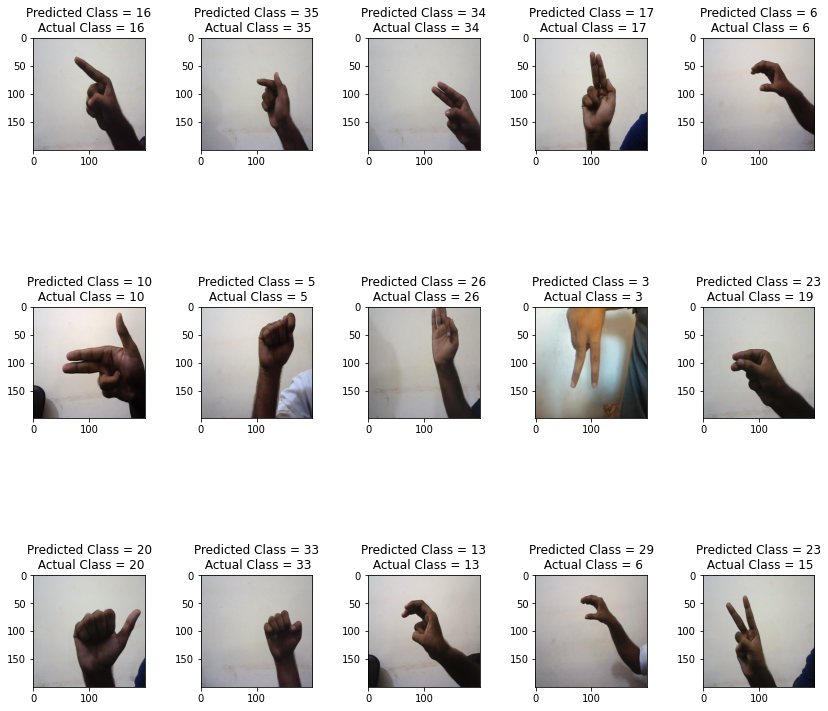

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {predicted_classes[i]}\n Actual Class = {Y_classes[i]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

# Transfer Learning (Feature Extraction) with Full Convolution Base

## Using ImageNet

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
len(base_model.layers) # VGG16 Layers

19

## Build Transfer Learning Model with Feature Extraction (Full Conv Base)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)
VGG16_model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
len(VGG16_model.layers) #Our Model Total Layers

22

In [ ]:
for layer in VGG16_model.layers[:19]:
  layer.trainable=False
for layer in VGG16_model.layers[19:]:
  layer.trainable=True
VGG16_model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
from time import time
tic = time()
history_tlearn = VGG16_model.fit(X_train,Y_train, validation_split= 0.2,epochs=50, batch_size=32, verbose=1)
toc = time()
print(f"Training took {toc - tic} secs")

Epoch 1/50
27/27 [==============================] - 32s 611ms/step - loss: 3.7092 - accuracy: 0.0320 - val_loss: 3.6412 - val_accuracy: 0.0236
Epoch 2/50
27/27 [==============================] - 7s 259ms/step - loss: 3.6170 - accuracy: 0.0545 - val_loss: 3.6244 - val_accuracy: 0.0283
Epoch 3/50
27/27 [==============================] - 7s 260ms/step - loss: 3.5884 - accuracy: 0.0794 - val_loss: 3.6055 - val_accuracy: 0.0425
Epoch 4/50
27/27 [==============================] - 7s 260ms/step - loss: 3.5670 - accuracy: 0.0948 - val_loss: 3.6044 - val_accuracy: 0.0236
Epoch 5/50
27/27 [==============================] - 7s 262ms/step - loss: 3.5557 - accuracy: 0.0924 - val_loss: 3.5955 - val_accuracy: 0.0472
Epoch 6/50
27/27 [==============================] - 7s 261ms/step - loss: 3.5412 - accuracy: 0.1090 - val_loss: 3.5814 - val_accuracy: 0.0613
Epoch 7/50
27/27 [==============================] - 7s 261ms/step - loss: 3.5283 - accuracy: 0.1055 - val_loss: 3.5786 - val_accuracy: 0.0613
Epoch

## Evaluate Model

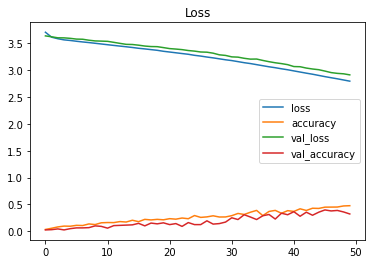

In [ ]:
pd.DataFrame(history_tlearn.history).plot()
plt.title("Loss")
plt.show()

Text(0.5, 1.0, 'Loss evolution')

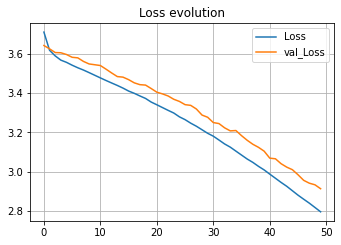

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history_tlearn.history['loss'], label='Loss')
plt.plot(history_tlearn.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

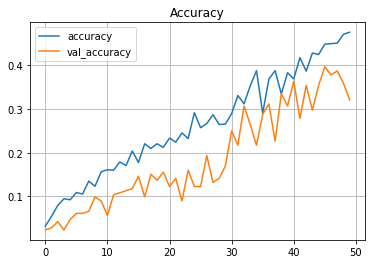

In [ ]:
plt.subplot(1,1,1)
plt.plot(history_tlearn.history['accuracy'],label='accuracy')
plt.plot(history_tlearn.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
VGG16_model.save('/content/drive/MyDrive/Deep Learning Project/model_full_conv_feature_extraction.h5')

In [ ]:
from tensorflow.keras.models import load_model
VGG16_model=load_model('/content/drive/MyDrive/Deep Learning Project/model_full_conv_feature_extraction.h5')

In [ ]:
VGG16_model.evaluate(X_test,Y_test,verbose=2)

15/15 - 21s - loss: 2.7946 - accuracy: 0.4327 - 21s/epoch - 1s/step


[2.794558525085449, 0.43267107009887695]

In [ ]:
y_pred=VGG16_model.predict(X_test)

In [ ]:
print(y_pred.shape)
y_pred=np.argmax(y_pred,1)
print(y_pred.shape)
print(Y_test.shape)
Y_test=np.argmax(Y_test,1)
print(Y_test.shape)

(453, 38)
(453,)
(453, 38)
(453,)


In [ ]:
from sklearn import metrics
score=metrics.accuracy_score(Y_test,y_pred)
print(f"Accuracy test: {score}")
print(f'Classification Report:')
print(metrics.classification_report(Y_test,y_pred))
print(f'Confusion Matrix')
print(metrics.confusion_matrix(Y_test,y_pred))

Accuracy test: 0.4326710816777042
Classification Report:
              precision    recall  f1-score   support

           1       0.27      1.00      0.42        12
           2       0.82      0.90      0.86        10
           3       0.83      0.71      0.77        14
           4       0.59      0.95      0.73        20
           5       0.00      0.00      0.00        20
           6       0.27      1.00      0.42        14
           7       0.93      1.00      0.96        13
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        13
          10       1.00      0.83      0.91        12
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        11
          13       0.75      0.40      0.52        15
          14       1.00      0.85      0.92        13
          15       0.15      1.00      0.26         9
          16       0.16      1.00      0.27        13
          17       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1440x1440 with 0 Axes>

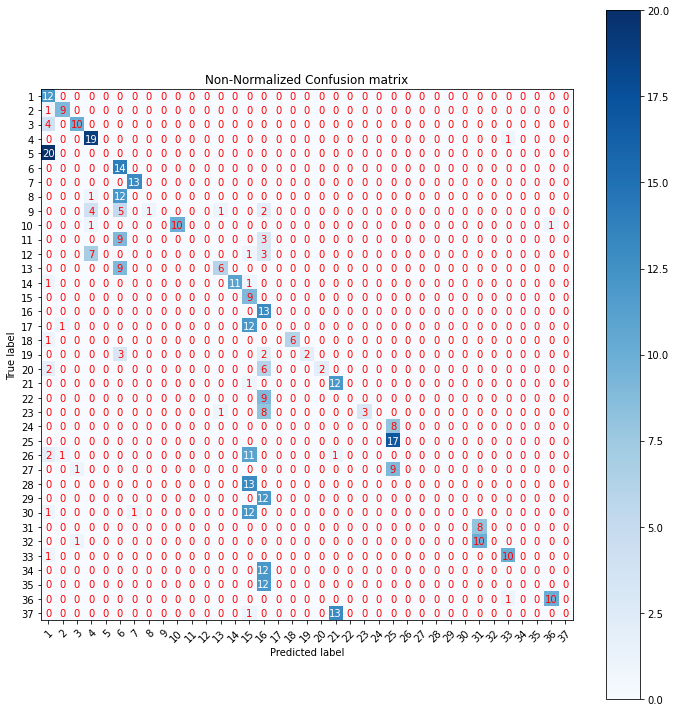

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,y_pred)
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        # Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
# Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
#Specifying class labels
class_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,31,32,33,34,35,36,37,38]
plt.figure(figsize=(20,20))
plot_confusion_matrix(Y_test,y_pred, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

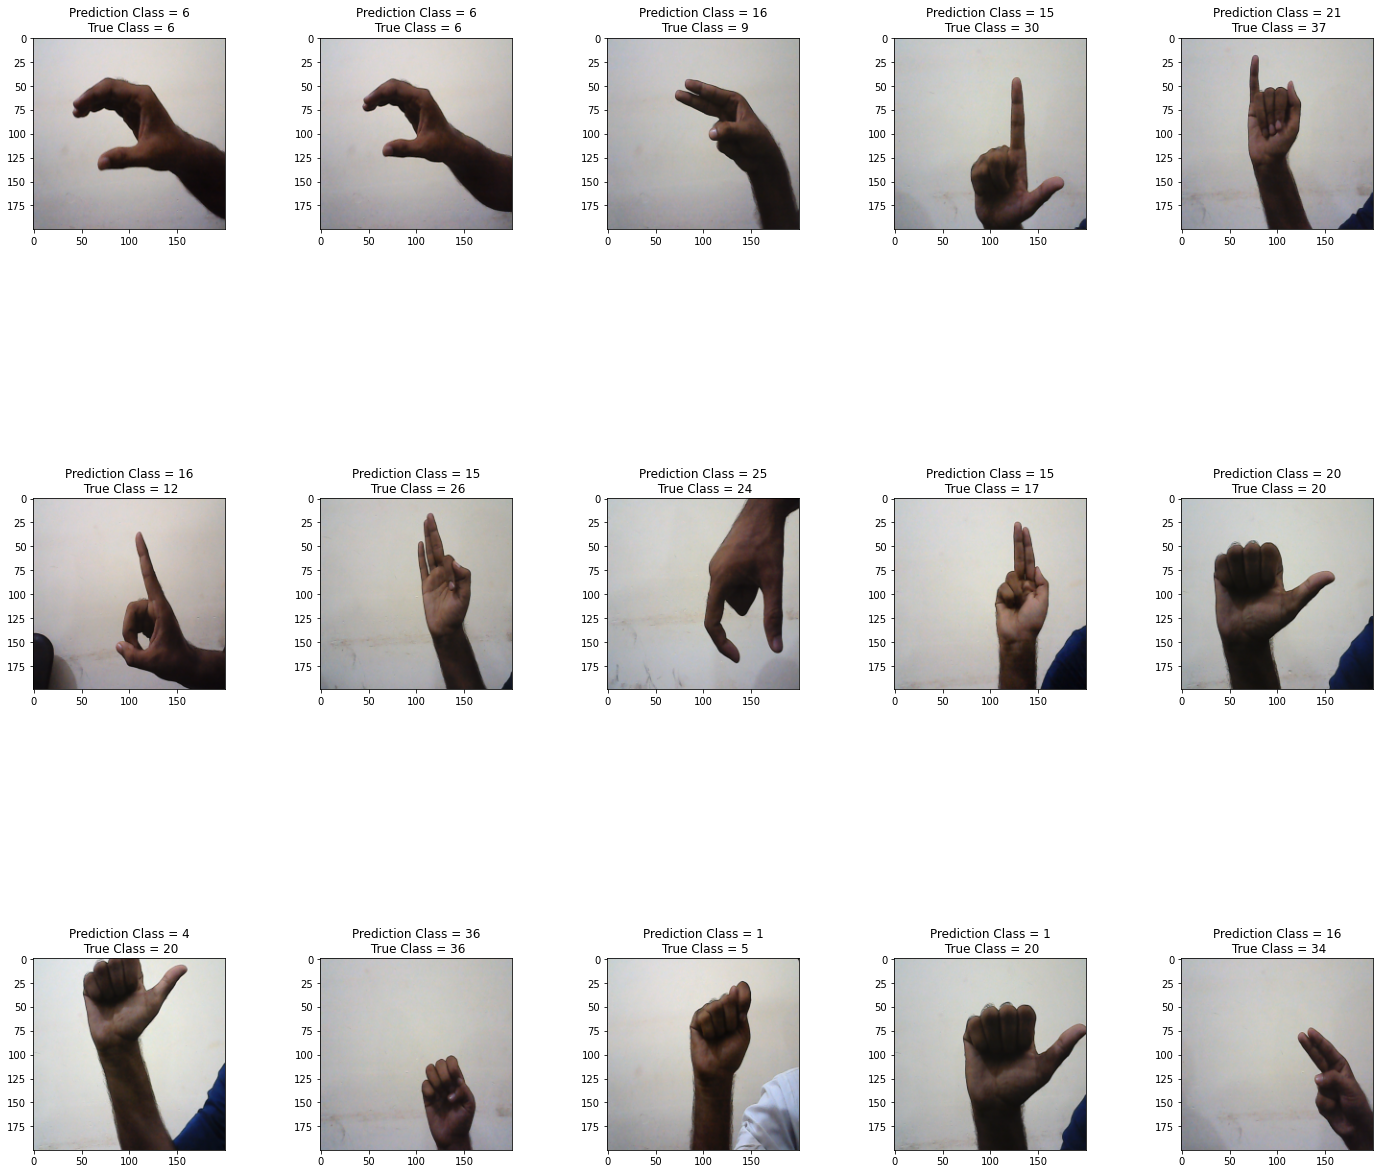

In [ ]:
predicted_classes=VGG16_model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (24,24))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {Y_classes[i]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

# Transfer Learning (Feature Extraction with Small Convolutional Base)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
base_model=VGG16(weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


# Build Model Transfer Learning (Feature Extraction with Small Convolutional Base)

In [ ]:
x=base_model.get_layer("block3_pool").output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
scb_pred=Dense(38,activation='softmax')(x)
scb_model=Model(inputs=base_model.inputs,outputs=scb_pred)

In [ ]:
len(scb_model.layers)

14

In [ ]:
for layer in scb_model.layers[:11]:
  layer.trainable=False
for layer in scb_model.layers[11:]:
  layer.trainable=True
scb_model.compile(loss="categorical_crossentropy",
                  optimizer="sgd",metrics=["accuracy"])
scb_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
from time import time
tic=time()
hist_scb=scb_model.fit(X_train,Y_train,
                       validation_split=0.2,
                       epochs=50,
                       batch_size=32,
                       verbose=1)
toc=time()
print(f'Training took {toc-tic} secs')

Epoch 1/50
27/27 [==============================] - 27s 447ms/step - loss: 8.8214 - accuracy: 0.0344 - val_loss: 3.6069 - val_accuracy: 0.0425
Epoch 2/50
27/27 [==============================] - 5s 189ms/step - loss: 3.5994 - accuracy: 0.0498 - val_loss: 3.5605 - val_accuracy: 0.0802
Epoch 3/50
27/27 [==============================] - 5s 190ms/step - loss: 3.5604 - accuracy: 0.0616 - val_loss: 3.5263 - val_accuracy: 0.0330
Epoch 4/50
27/27 [==============================] - 5s 189ms/step - loss: 3.5009 - accuracy: 0.0664 - val_loss: 3.5936 - val_accuracy: 0.0425
Epoch 5/50
27/27 [==============================] - 5s 189ms/step - loss: 3.4696 - accuracy: 0.0782 - val_loss: 3.4289 - val_accuracy: 0.0755
Epoch 6/50
27/27 [==============================] - 5s 191ms/step - loss: 3.3754 - accuracy: 0.0841 - val_loss: 3.4209 - val_accuracy: 0.0660
Epoch 7/50
27/27 [==============================] - 5s 190ms/step - loss: 3.3186 - accuracy: 0.0841 - val_loss: 3.2973 - val_accuracy: 0.0566
Epoch

In [ ]:
scb_model.save('/content/drive/MyDrive/Deep Learning Project/scb_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
scb_model=load_model('/content/drive/MyDrive/Deep Learning Project/scb_model.h5')

## Evaluate Model

Text(0.5, 1.0, 'Loss evolution')

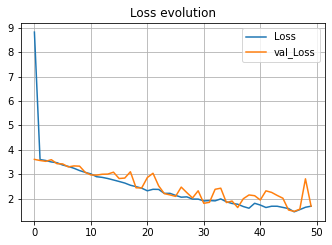

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(hist_scb.history['loss'], label='Loss')
plt.plot(hist_scb.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

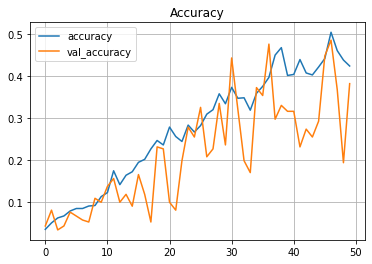

In [ ]:
plt.subplot(1,1,1)
plt.plot(hist_scb.history['accuracy'],label='accuracy')
plt.plot(hist_scb.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
scb_model.evaluate(X_test,Y_test,verbose=2)

15/15 - 4s - loss: 1.7080 - accuracy: 0.4216 - 4s/epoch - 250ms/step


[1.7079722881317139, 0.4216335415840149]

In [ ]:
y_pred=scb_model.predict(X_test)
y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(Y_test,1)
y_pred.shape,Y_test.shape

((453,), (453,))

In [ ]:
from sklearn import metrics
score=metrics.accuracy_score(Y_test,y_pred)
print(f"Accuracy test: {score}")
print(f'Classification Report:')
print(metrics.classification_report(Y_test,y_pred))
print(f'Confusion Matrix')
print(metrics.confusion_matrix(Y_test,y_pred))

Accuracy test: 0.4216335540838852
Classification Report:
              precision    recall  f1-score   support

           1       0.28      1.00      0.44        14
           2       1.00      0.38      0.56        13
           3       0.00      0.00      0.00        13
           4       1.00      0.79      0.88        14
           5       0.00      0.00      0.00        18
           6       0.42      0.62      0.50        16
           7       0.33      0.31      0.32        13
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        11
          10       1.00      0.90      0.95        10
          11       0.31      0.33      0.32        12
          12       1.00      0.54      0.70        13
          13       0.50      0.82      0.62        11
          14       0.32      0.78      0.45         9
          15       0.73      0.50      0.59        16
          16       0.00      0.00      0.00        12
          17       0.33 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1440x1440 with 0 Axes>

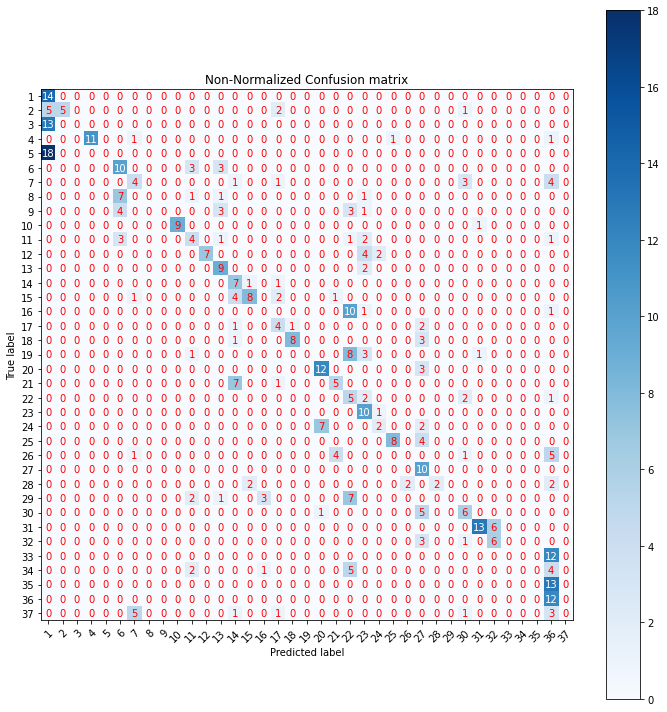

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,y_pred)
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        # Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
# Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
#Specifying class labels
class_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,31,32,33,34,35,36,37,38]
plt.figure(figsize=(20,20))
plot_confusion_matrix(Y_test,y_pred, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

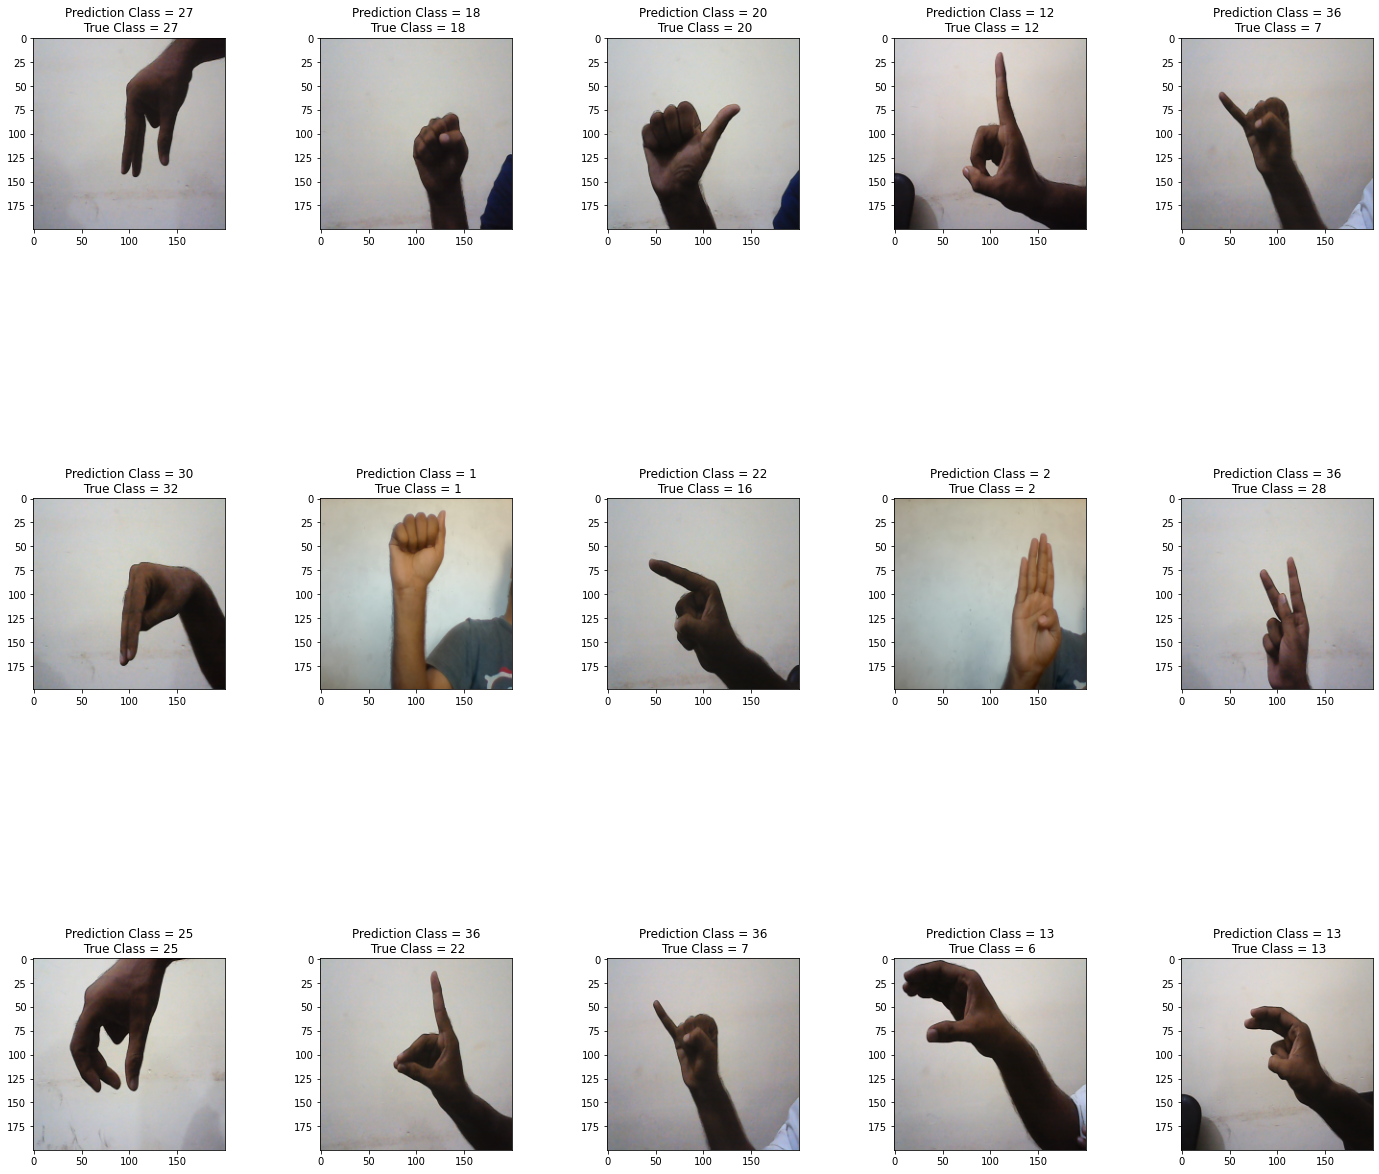

In [ ]:
predicted_classes=scb_model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (24,24))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {Y_classes[i]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

# Transfer Learning (Fine Tuning)
  ### 1- Train the top by freezing the intermediate layers to retain trained weights
  ### 2- Fine tune intermediate layer weights

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
base_model=VGG16(weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


## Build Model Transfer Learning (Fine Tuning)

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

model_vgg16=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in model_vgg16.layers[:19]:
  layer.trainable=False
for layer in model_vgg16.layers[19:]:
  layer.trainable=True

model_vgg16.compile(loss='categorical_crossentropy',
                    optimizer='sgd',
                    metrics=['accuracy'])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
from time import time
tic=time()
hist_tlearn=model_vgg16.fit(X_train,Y_train,validation_split=0.2,
                            epochs=25,batch_size=32,
                            verbose=2)
toc=time()
print(f'Training took {toc-tic} secs')

Epoch 1/25
27/27 - 23s - loss: 3.7124 - accuracy: 0.0308 - val_loss: 3.6456 - val_accuracy: 0.0330 - 23s/epoch - 835ms/step
Epoch 2/25
27/27 - 3s - loss: 3.6270 - accuracy: 0.0391 - val_loss: 3.6306 - val_accuracy: 0.0330 - 3s/epoch - 124ms/step
Epoch 3/25
27/27 - 3s - loss: 3.5964 - accuracy: 0.0438 - val_loss: 3.6152 - val_accuracy: 0.0330 - 3s/epoch - 124ms/step
Epoch 4/25
27/27 - 3s - loss: 3.5781 - accuracy: 0.0498 - val_loss: 3.5932 - val_accuracy: 0.0330 - 3s/epoch - 125ms/step
Epoch 5/25
27/27 - 3s - loss: 3.5645 - accuracy: 0.0438 - val_loss: 3.5909 - val_accuracy: 0.0472 - 3s/epoch - 125ms/step
Epoch 6/25
27/27 - 3s - loss: 3.5500 - accuracy: 0.0533 - val_loss: 3.5747 - val_accuracy: 0.0755 - 3s/epoch - 125ms/step
Epoch 7/25
27/27 - 3s - loss: 3.5366 - accuracy: 0.0604 - val_loss: 3.5614 - val_accuracy: 0.0519 - 3s/epoch - 125ms/step
Epoch 8/25
27/27 - 3s - loss: 3.5215 - accuracy: 0.0687 - val_loss: 3.5462 - val_accuracy: 0.0896 - 3s/epoch - 125ms/step
Epoch 9/25
27/27 - 3s 

In [ ]:
# The Actual Fine-Tuning Phase
for layer in model_vgg16.layers[11:]:
    layer.trainable = True
model_vgg16.compile(loss = "categorical_crossentropy", optimizer = "sgd",metrics= ["accuracy"])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
hist_tlearn = model_vgg16.fit(X_train,Y_train, validation_split= 0.2,epochs=25, batch_size=32, verbose=1)

Epoch 1/25
27/27 [==============================] - 8s 209ms/step - loss: 2.6307 - accuracy: 0.3235 - val_loss: 3.5795 - val_accuracy: 0.1509
Epoch 2/25
27/27 [==============================] - 5s 186ms/step - loss: 1.7210 - accuracy: 0.5142 - val_loss: 1.3722 - val_accuracy: 0.5896
Epoch 3/25
27/27 [==============================] - 5s 186ms/step - loss: 0.7172 - accuracy: 0.8223 - val_loss: 0.3327 - val_accuracy: 0.9198
Epoch 4/25
27/27 [==============================] - 5s 187ms/step - loss: 0.3351 - accuracy: 0.9230 - val_loss: 0.2033 - val_accuracy: 0.9764
Epoch 5/25
27/27 [==============================] - 5s 187ms/step - loss: 0.0883 - accuracy: 0.9846 - val_loss: 0.1525 - val_accuracy: 0.9575
Epoch 6/25
27/27 [==============================] - 5s 188ms/step - loss: 0.0709 - accuracy: 0.9822 - val_loss: 0.1938 - val_accuracy: 0.9340
Epoch 7/25
27/27 [==============================] - 5s 188ms/step - loss: 0.0313 - accuracy: 0.9941 - val_loss: 0.0772 - val_accuracy: 0.9811
Epoch 

## Evaluate Model

Text(0.5, 1.0, 'Loss evolution')

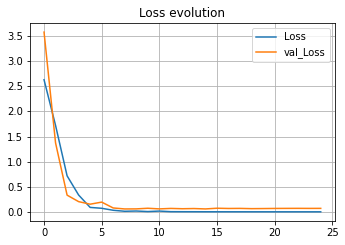

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(hist_tlearn.history['loss'], label='Loss')
plt.plot(hist_tlearn.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

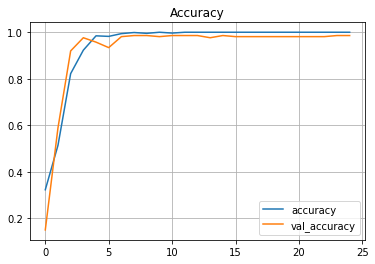

In [ ]:
plt.subplot(1,1,1)
plt.plot(hist_tlearn.history['accuracy'],label='accuracy')
plt.plot(hist_tlearn.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
model_vgg16.save('/content/drive/MyDrive/Deep Learning Project/vgg16_model_finetune.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_vgg16=load_model('/content/drive/MyDrive/Deep Learning Project/vgg16_model_finetune.h5')

In [ ]:
model_vgg16.evaluate(X_test,Y_test,verbose=2)

15/15 - 3s - loss: 0.0162 - accuracy: 0.9912 - 3s/epoch - 186ms/step


[0.016245268285274506, 0.9911699891090393]

In [ ]:
y_pred=model_vgg16.predict(X_test)
y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(Y_test,1)
y_pred.shape,Y_test.shape

((453,), (453,))

In [ ]:
from sklearn import metrics
score=metrics.accuracy_score(Y_test,y_pred)
print(f"Accuracy test: {score}")
print(f'Classification Report:')
print(metrics.classification_report(Y_test,y_pred))
print(f'Confusion Matrix')
print(metrics.confusion_matrix(Y_test,y_pred))

Accuracy test: 0.9911699779249448
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        14
           8       1.00      0.93      0.97        15
           9       0.93      1.00      0.96        13
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00        10
          12       1.00      0.90      0.95        10
          13       1.00      0.88      0.93         8
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        15
          17       1.00 

<Figure size 1440x1440 with 0 Axes>

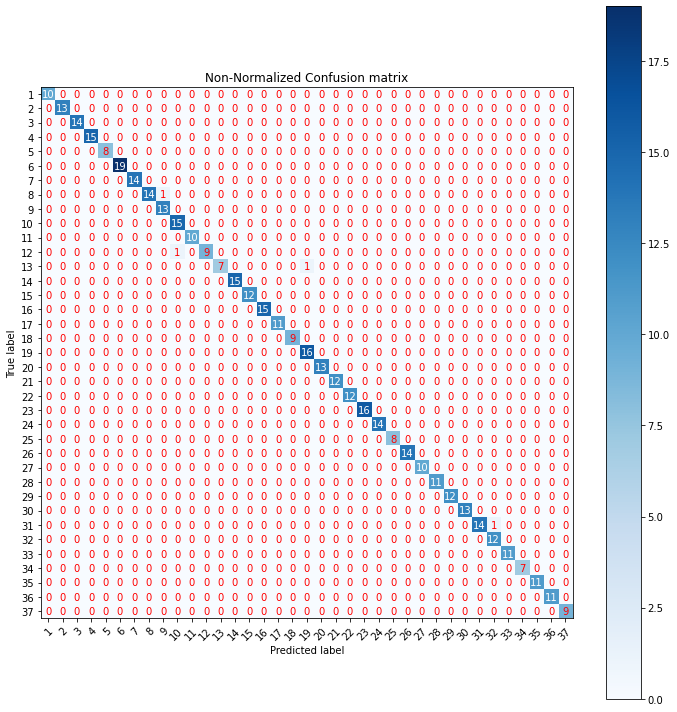

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,y_pred)
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        # Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
# Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
#Specifying class labels
class_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,31,32,33,34,35,36,37,38]
plt.figure(figsize=(20,20))
plot_confusion_matrix(Y_test,y_pred, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

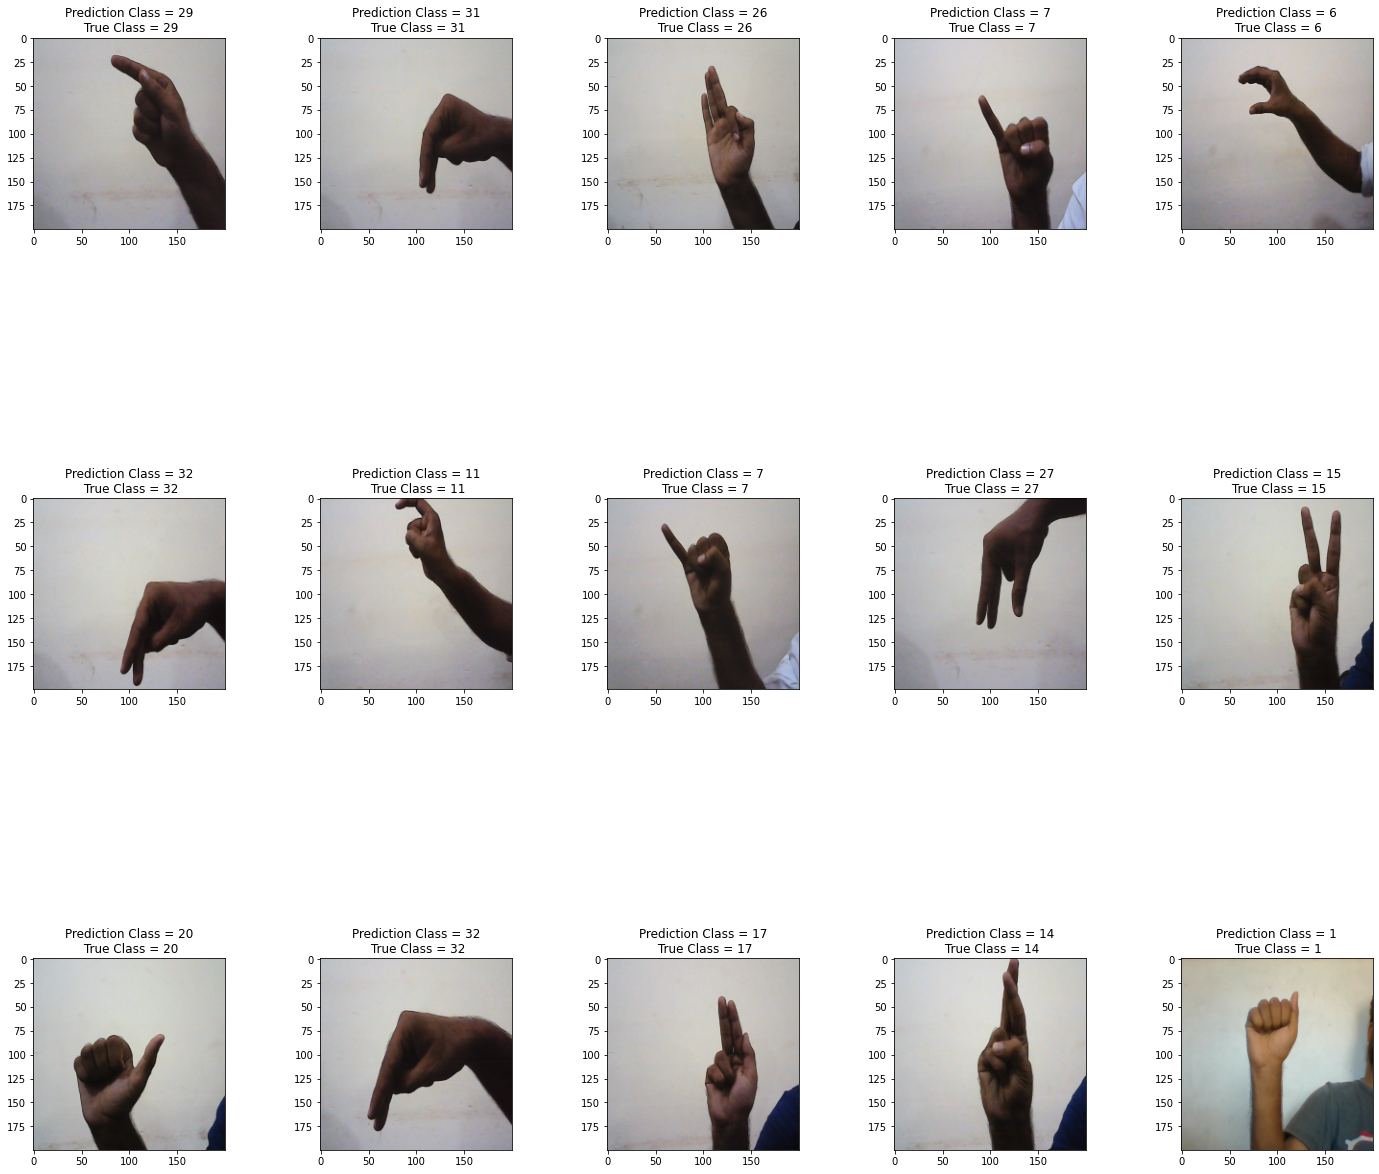

In [ ]:
predicted_classes=model_vgg16.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (24,24))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {Y_classes[i]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [ ]:
Predicted_labels=y_pred.tolist()
Actual_labels=Y_test.tolist()
print(Predicted_labels)
print(Actual_labels)

[29, 31, 26, 7, 6, 32, 11, 7, 27, 15, 20, 32, 17, 14, 1, 31, 28, 11, 17, 36, 6, 16, 3, 4, 35, 13, 18, 19, 28, 5, 32, 30, 12, 22, 26, 23, 2, 16, 15, 33, 2, 19, 6, 19, 23, 20, 32, 29, 31, 24, 33, 19, 3, 37, 26, 10, 15, 22, 36, 24, 6, 6, 2, 28, 27, 32, 24, 25, 23, 21, 15, 12, 20, 20, 16, 25, 18, 22, 8, 16, 22, 33, 31, 15, 7, 1, 16, 9, 36, 17, 23, 24, 29, 29, 37, 22, 25, 26, 9, 27, 21, 19, 37, 10, 34, 19, 10, 5, 2, 2, 10, 18, 33, 14, 13, 20, 4, 21, 27, 31, 6, 14, 35, 4, 16, 22, 27, 19, 9, 30, 10, 9, 37, 10, 1, 4, 23, 37, 11, 16, 34, 2, 3, 1, 5, 37, 4, 19, 3, 22, 23, 30, 4, 31, 15, 7, 20, 36, 30, 1, 7, 35, 7, 13, 10, 35, 10, 19, 21, 3, 20, 8, 8, 22, 20, 29, 2, 30, 16, 30, 9, 6, 9, 27, 7, 24, 22, 35, 14, 12, 5, 8, 7, 3, 8, 33, 28, 17, 9, 31, 27, 32, 35, 24, 31, 9, 7, 7, 5, 12, 30, 25, 20, 26, 20, 19, 14, 18, 37, 26, 4, 1, 21, 33, 5, 36, 23, 18, 13, 17, 18, 30, 4, 32, 26, 15, 19, 34, 24, 15, 36, 14, 24, 29, 33, 13, 7, 26, 31, 23, 14, 6, 24, 15, 11, 18, 8, 7, 31, 19, 7, 25, 3, 12, 4, 14, 31, 2